In [1]:
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd

#set.seed(13)

In [2]:
ds = load_wine()

### Dados do dataset

In [3]:
print(ds.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


### Features do dataset

In [4]:
print(ds.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### Descrição do Dataset

In [5]:
ds.data.shape

(178, 13)

In [6]:
df = pd.DataFrame(ds.data, columns = ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Correlação entre variáveis

In [ ]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


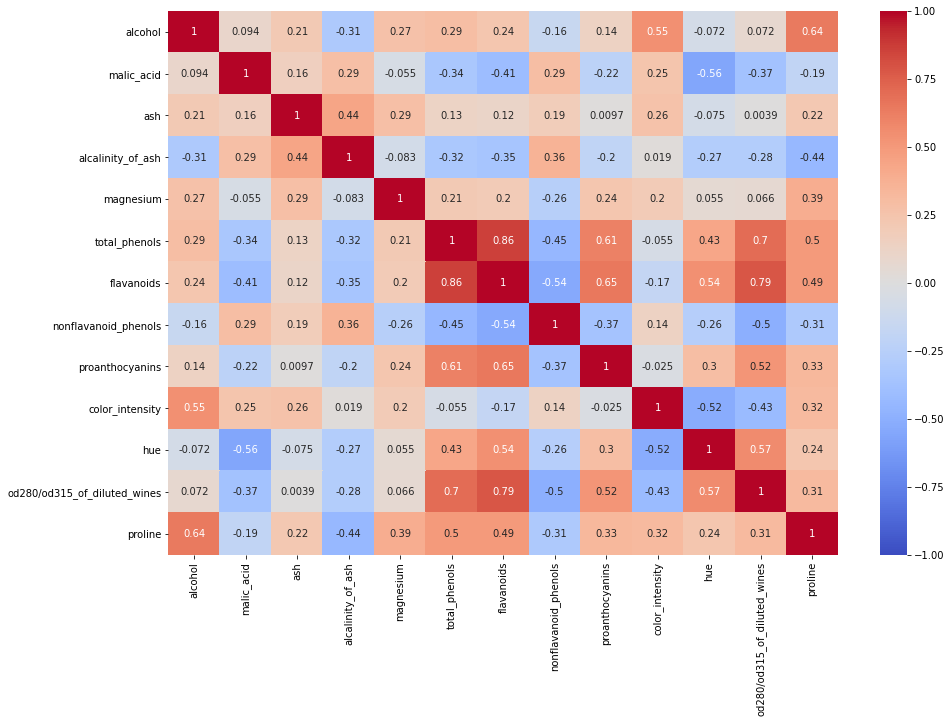

In [30]:
plt.subplots(figsize=(15, 10)) 
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, cmap='coolwarm')

### Test train split

In [7]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, test_size=0.2, shuffle=True, random_state=13)

#help(train_test_split)

### BaseLines

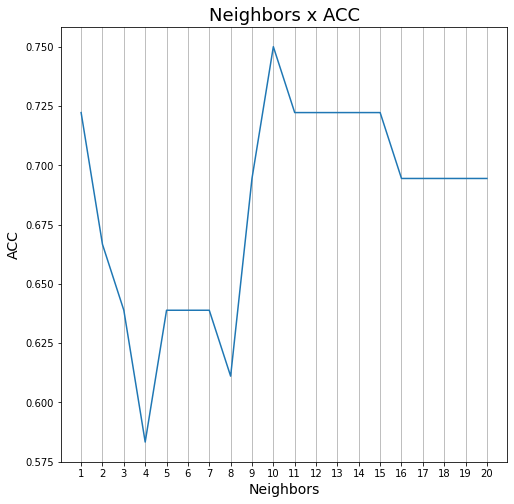

O melhor resultado é o de 75.00% de acurácia


In [8]:
from sklearn.neighbors import KNeighborsClassifier
import time
import matplotlib.pyplot as plt

KNN_class=[]

def Train_KNN():

  score_list = []
  n_list = np.arange(1, 21)

  for i in n_list:

      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(X_train, y_train)
      # kfold=KFold(n_splits=10, random_state=13)
      # cv_results= cross_val_score(neigh, X_train, Y_train, cv=kfold,scoring='accuracy')
      score_list.append(neigh.score(X_test, y_test))

  plt.figure(figsize=(8,8))
  plt.plot(n_list, score_list)
  plt.title("Neighbors x ACC", fontsize=18)
  plt.grid(axis='x')
  plt.ylabel("ACC", fontsize=14)
  plt.xticks(n_list)
  plt.xlabel("Neighbors", fontsize=14)
  plt.show()
  print('O melhor resultado é o de {:.2f}% de acurácia'.format(max(score_list)*100))

  

  KNN_class.extend(score_list)


Train_KNN()

In [9]:
from sklearn.neural_network import  MLPClassifier
# from sklearn.metrics import roc_curve, auc

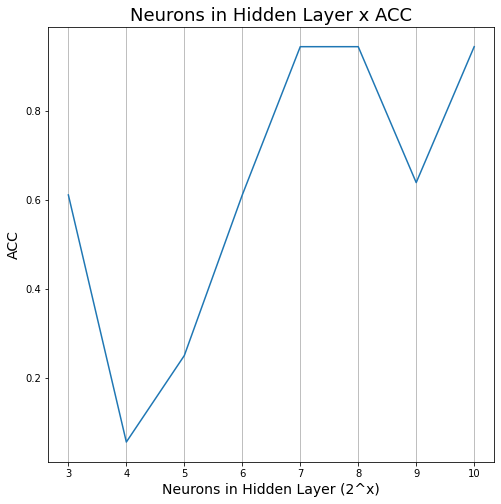

[0.6111111111111112, 0.05555555555555555, 0.25, 0.6111111111111112, 0.9444444444444444, 0.9444444444444444, 0.6388888888888888, 0.9444444444444444]


In [10]:
import random
random.seed(13)

MLP_class = []

def Train_MLP():

  score_list = []
  n_list = [8, 16, 32, 64, 128, 256, 512, 1024]

  for i in n_list:
    # Criando o modelo e definindo os parâmetros
    mlp = MLPClassifier(hidden_layer_sizes=i, activation='relu', solver='adam', max_iter=1000)

    # Treinando o modelo
    mlp.fit(X_train, y_train)

    # kfold=KFold(n_splits=10, random_state=13)
    # cv_results= cross_val_score(mlp, X_train, Y_train, cv=kfold,scoring='accuracy')

    score_list.append(mlp.score(X_test, y_test))

  plt.figure(figsize=(8,8))
  plt.plot([3, 4, 5, 6, 7, 8, 9, 10], score_list)
  plt.grid(axis='x')
  plt.title("Neurons in Hidden Layer x ACC", fontsize=18)
  plt.ylabel("ACC", fontsize=14)
  plt.xticks([3, 4, 5, 6, 7, 8, 9, 10])
  plt.xlabel("Neurons in Hidden Layer (2^x)", fontsize=14)
  plt.show()

  print(score_list)

  MLP_class.extend(score_list)

Train_MLP()

### Pair Plot

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df_class = df.join(pd.Series(ds.target, name='target'))
df_class1 = df.iloc[:, :7].join(pd.Series(ds.target, name='target'))
df_class2 = df.iloc[:, 7:].join(pd.Series(ds.target, name='target'))

6 primeiras features

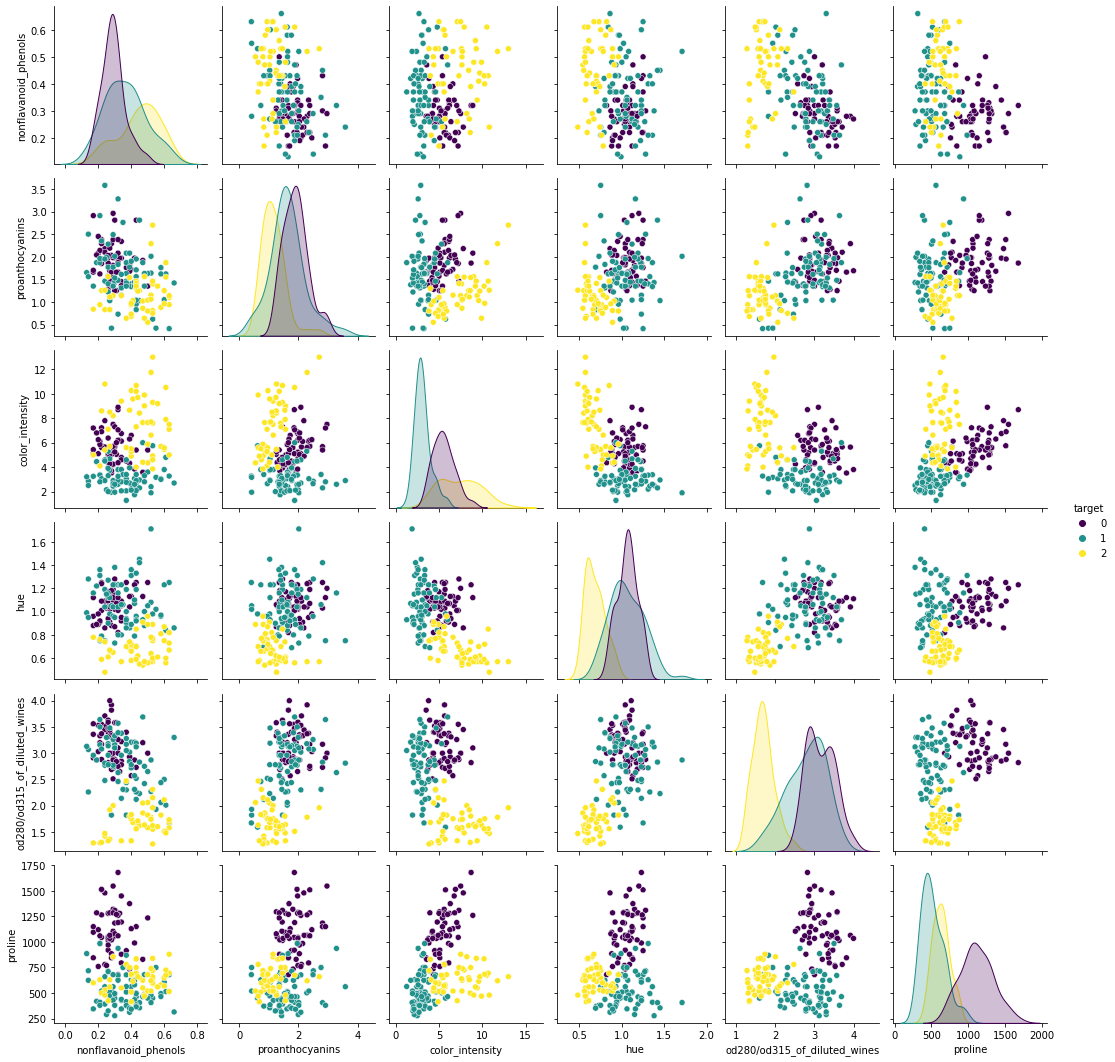

In [ ]:
sns.pairplot(df_class2, hue='target', palette='viridis')
plt.show()

7 ultimas features

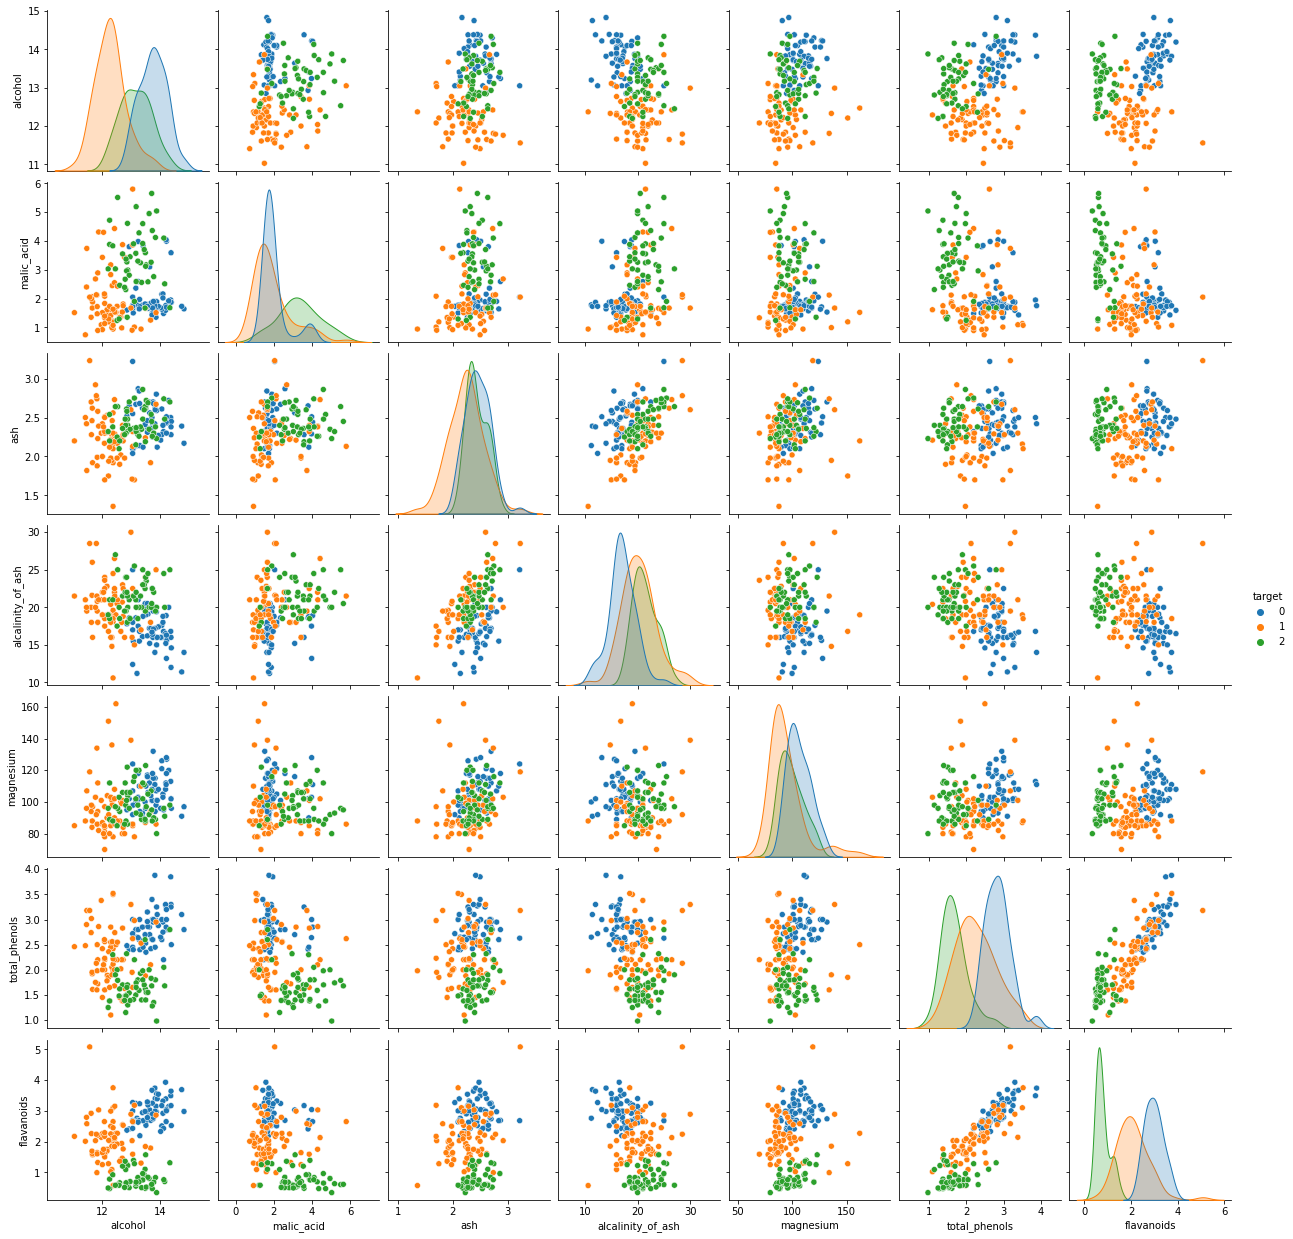

In [ ]:
sns.pairplot(df_class1, hue='target', palette='tab10')
plt.show()

### BoxPlot

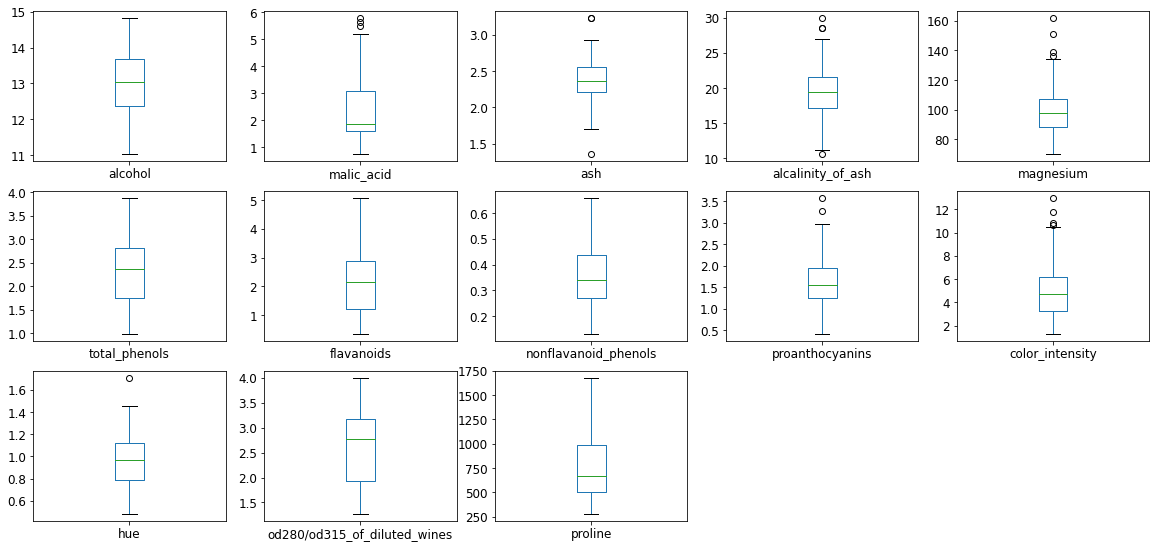

In [23]:
df.plot(kind='box', subplots=True, layout=(5,5), fontsize=12, figsize=(20,16))
plt.show()

### Normalizar os dados

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(ds.data)

X_train, X_test, y_train, y_test = train_test_split(X_norm, ds.target, test_size=0.2, shuffle=True, random_state=13)

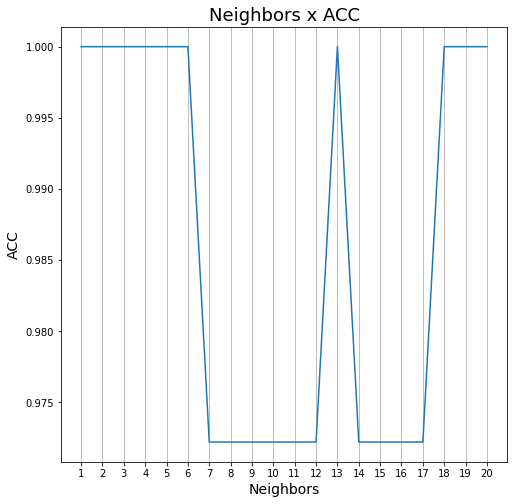

O melhor resultado é o de 100.00% de acurácia


In [14]:
Train_KNN()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


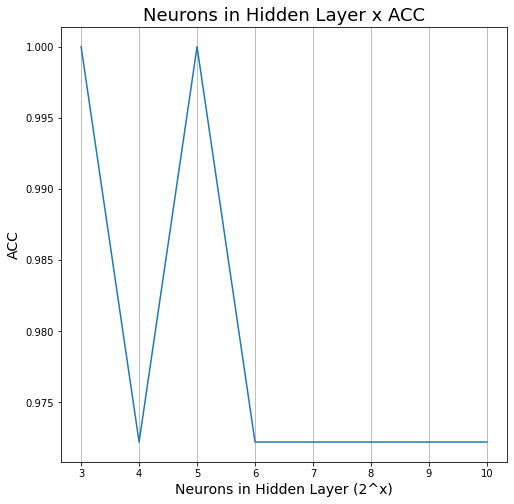

[1.0, 0.9722222222222222, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222]


In [ ]:
Train_MLP()

### Balancear os Dados

In [ ]:
df_class.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [15]:
!pip install simple_colors
from simple_colors import black

In [20]:
c0 = (1-df_class.target.value_counts()[0]/df_class.target.value_counts()[1])*100
c2 = (1-df_class.target.value_counts()[2]/df_class.target.value_counts()[1])*100
print('Comparado a classe de maior dados, a classe 1, exitem {:.2f}% e {:0.2f}% menos amostras para as classes 0 e 2, respectivamente.\nIsto'.format(c0,c2), black('pode (ou não)', 'bold'),'gerar resultados ilusórios.')

Comparado a classe de maior dados, a classe 1, exitem 16.90% e 32.39% menos amostras para as classes 0 e 2, respectivamente.
Isto pode (ou não) gerar resultados ilusórios.


Estratégia 1: Downsampling das classes com mais amostras

In [ ]:
from sklearn.utils import resample

# Separando classes
df0 = df_class[df_class.target==0]
df1 = df_class[df_class.target==1]
df2 = df_class[df_class.target==2] #48 amostras
 
# Downsample das classes com mais amostras
df0_down = resample(df0, 
                    replace=False,    # sem substituições
                    n_samples=48,     # numero de amostras da classe minoria
                    random_state=13)  

df1_down = resample(df1, 
                    replace=False,    
                    n_samples=48,     
                    random_state=13) 
 
# Combinando dataset
df_down = pd.concat([df0_down, df1_down, df2])
 
# Display new class counts
df_down.target.value_counts()

2    48
1    48
0    48
Name: target, dtype: int64

In [ ]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(df_down.iloc[:, :-1])

X_train, X_test, y_train, y_test = train_test_split(X_norm, df_down.iloc[:, -1], test_size=0.2, shuffle=True, random_state=13)

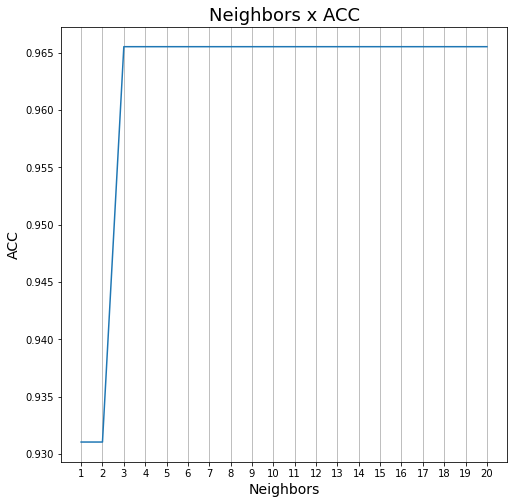

O melhor resultado é o de 96.55% de acurácia


In [ ]:
Train_KNN()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


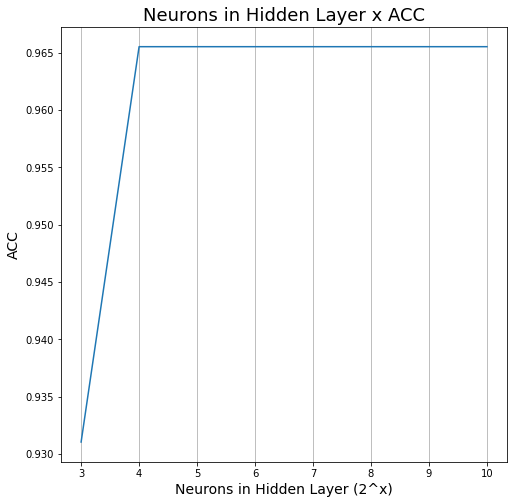

[0.9310344827586207, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104]


In [ ]:
Train_MLP()

Estratégia 2: Upsampling das classes com menos amostras

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE #data augmentation: Synthetic Minority Over-sampling Technique
from collections import Counter

#PS: Reforço que SMOTE cria dados sintéticos (não reais)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(ds.data, ds.target)

counter = Counter(y)
print(counter)

Counter({0: 71, 1: 71, 2: 71})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=13)

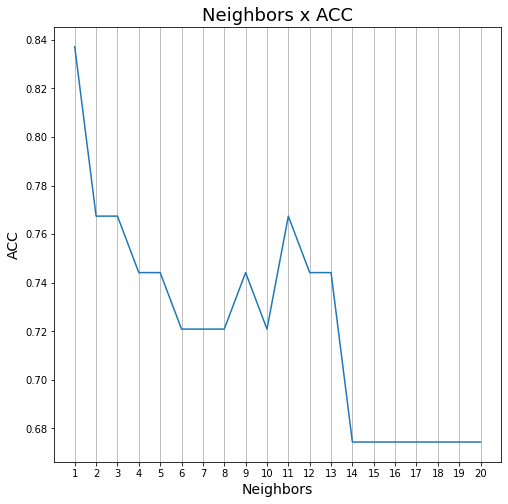

O melhor resultado é o de 83.72% de acurácia


In [ ]:
Train_KNN()

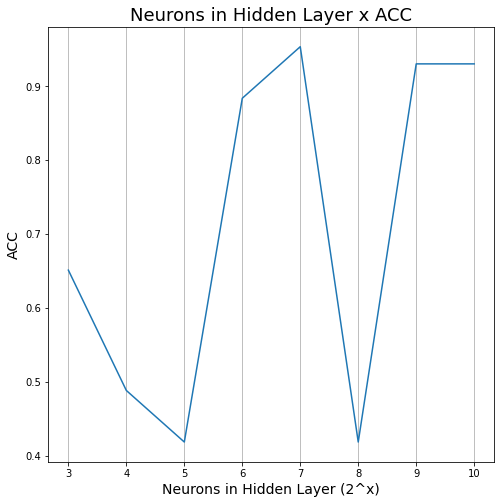

[0.6511627906976745, 0.4883720930232558, 0.4186046511627907, 0.8837209302325582, 0.9534883720930233, 0.4186046511627907, 0.9302325581395349, 0.9302325581395349]


In [ ]:
Train_MLP()

### Media e Desvio Padrão dos Classificadores Treinados

In [ ]:
from statistics import mean, stdev

print('Classificadores KNN: A quantidade de modelos treinados foi de {}, sua média foi {} e seu desvio padrão foi de {}'.format(len(KNN_class),mean(KNN_class), stdev(KNN_class)))
print('Classificadores MLP: A quantidade de modelos treinados foi de {}, sua média foi {} e seu desvio padrão foi de {}'.format(len(MLP_class),mean(MLP_class), stdev(MLP_class)))

Classificadores KNN: A quantidade de modelos treinados foi de 80, sua média foi 0.8386923059787935 e seu desvio padrão foi de 0.14096075205640834
Classificadores MLP: A quantidade de modelos treinados foi de 32, sua média foi 0.8438425833110577 e seu desvio padrão foi de 0.1977254623177109


## Bonus

LDA para Classificação

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
# Separando classes
df0 = df_class[df_class.target==0]
df1 = df_class[df_class.target==1]
df2 = df_class[df_class.target==2] #48 amostras
 
# Downsample das classes com mais amostras
df0_down = resample(df0, 
                    replace=False,    # sem substituições
                    n_samples=48,     # numero de amostras da classe minoria
                    random_state=13)  

df1_down = resample(df1, 
                    replace=False,    
                    n_samples=48,     
                    random_state=13) 
 
# Combinando dataset
df_down = pd.concat([df0_down, df1_down, df2])
 
# Display new class counts
df_down.target.value_counts()

2    48
1    48
0    48
Name: target, dtype: int64

In [40]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(df_down.iloc[:, :-1])

X_train, X_test, y_train, y_test = train_test_split(X_norm, df_down.iloc[:, -1], test_size=0.2, shuffle=True, random_state=13)

In [42]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions= LDA.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        14

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

[[10  0  0]
 [ 0  5  0]
 [ 0  0 14]]
